## San Francisco Crime Prediction
### Machine Learning I - ZHAW SoE - DS21a

Gérôme Meyer, Lea Keller, Alessio Drigatti

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

39


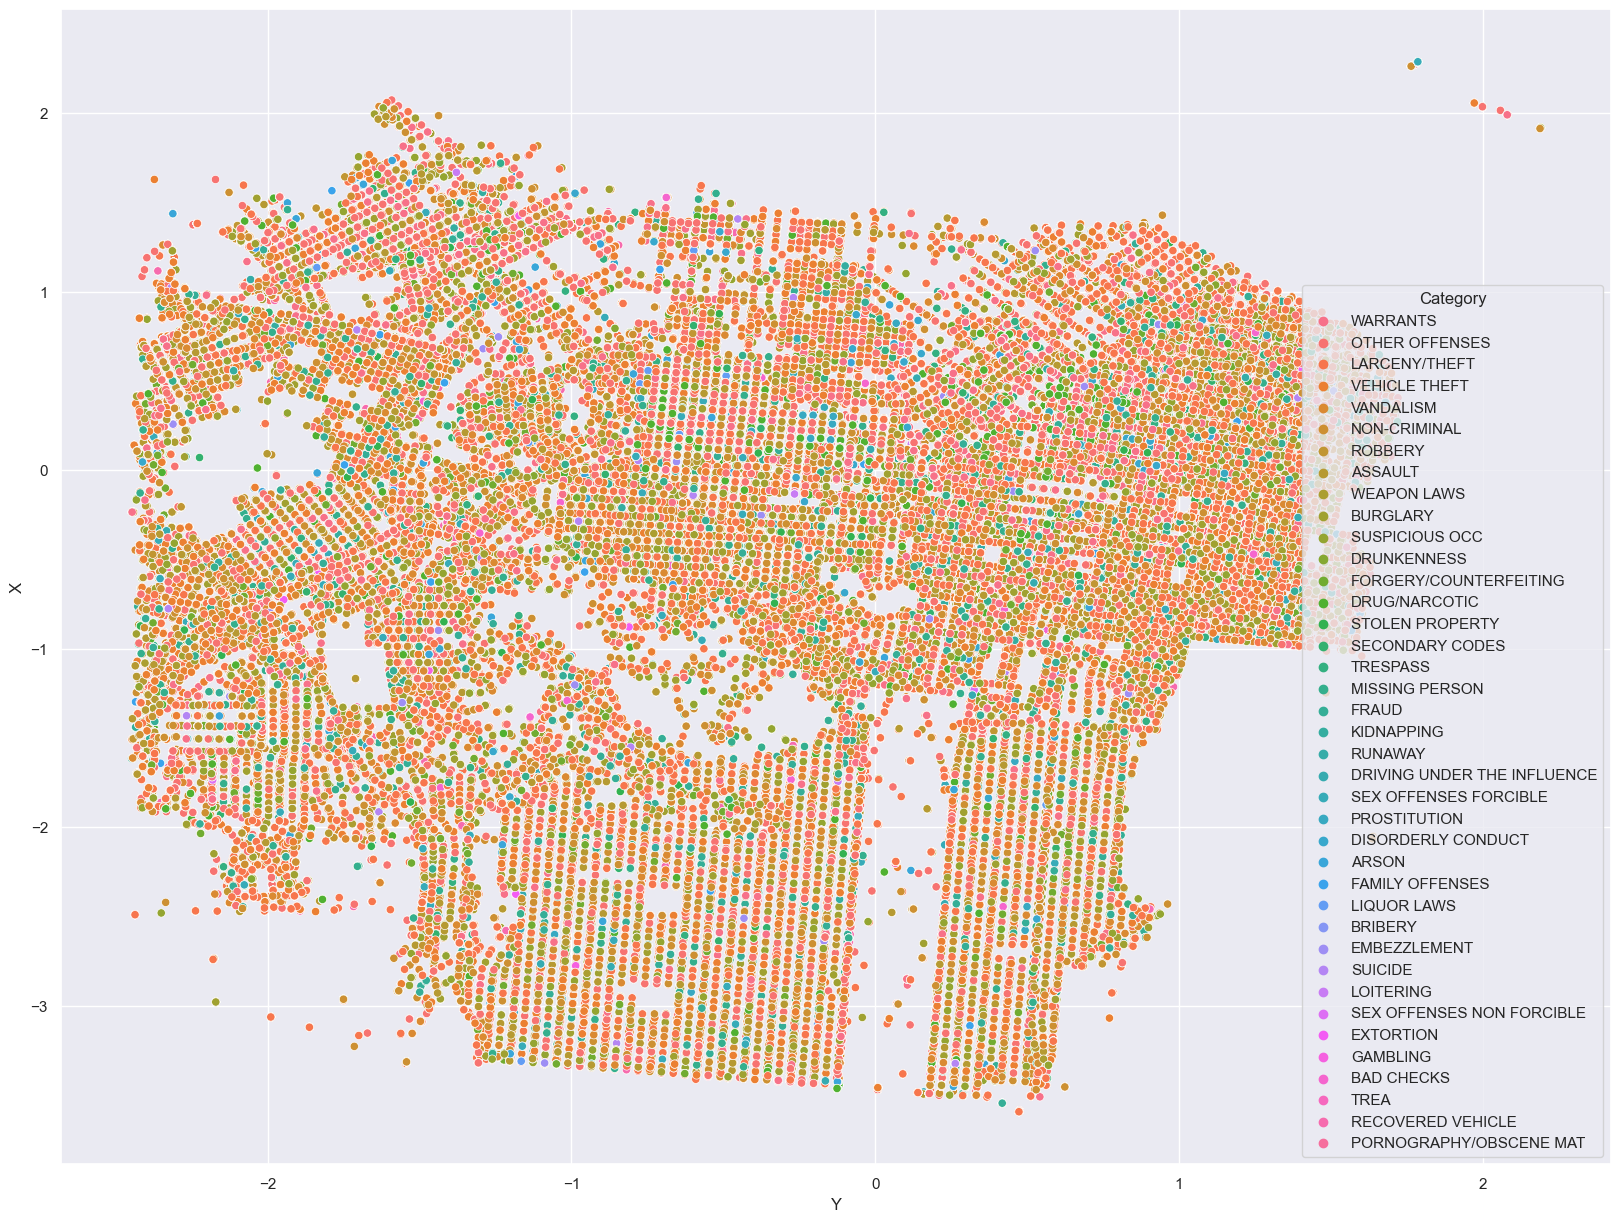

In [5]:
data = pd.read_csv('../data/train.csv')

# There seems to be invalid data that contains latitude = 90. (Which would be the North Pole)
data = data[data['Y'] != 90]
data = data[data['Category'] != 'NONE']

print(len(data['Category'].unique()))

standard_scaler = StandardScaler()
x = np.asarray(data['X']).reshape((-1, 1))
y = np.asarray(data['Y']).reshape((-1, 1))
data['X'] = StandardScaler().fit_transform(x)
data['Y'] = StandardScaler().fit_transform(y)

sns.set(rc={'figure.figsize': (20, 15)})
sns.scatterplot(data, x='Y', y='X', hue='Category')
plt.show()

In [ ]:
data = pd.read_csv('../data/train.csv')

# There seems to be invalid data that contains latitude = 90. (Which would be the North Pole)
data = data[data['Y'] != 90]

y_train = data['Category']

# The description and category are not part of the test data, therefore we cannot use them for training.
# And we need to drop the resolution variable since it is our target variable and also not part of the test data.
x_train = data.drop(['Descript', 'Category', 'Resolution'], axis=1)

# TODO: Extract this into a function. ###
# Split the date into its subcomponents
x_train[['year', 'month', 'day', 'hour', 'minute']] = x_train.Dates.str.extract(
    '(?P<year>\d{4})-(?P<month>\d{2})-(?P<day>\d{2}) (?P<hour>\d{2}):(?P<minute>\d{2})')

x_train["federal_holiday"] = "None"
x_train.loc[x_train['Dates'].str.match('\d{4}-01-01'), 'federal_holiday'] = 'new_year'
x_train.loc[x_train['Dates'].str.match('\d{4}-07-04'), 'federal_holiday'] = 'independence_day'
x_train.loc[x_train['Dates'].str.match('\d{4}-11-24'), 'federal_holiday'] = 'thanksgiving'
x_train.loc[x_train['Dates'].str.match('\d{4}-12-25'), 'federal_holiday'] = 'christmas_day'
x_train.loc[x_train['Dates'].str.match('\d{4}-12-26'), 'federal_holiday'] = 'christmas_day'
x_train.loc[x_train['Dates'].str.match('\d{4}-12-31'), 'federal_holiday'] = 'new_year'

x_train.drop(['Dates'], inplace=True, axis=1)

# Convert the date numbers into actual integers
x_train = x_train.astype({
    'year': 'float64',
    'month': 'float64',
    'day': 'float64',
    'hour': 'float64',
    'minute': 'float64',
})

x_train.loc[x_train['hour']<=7,'isday']= 0
x_train.loc[x_train['hour']>7,'isday']= 1
x_train.loc[x_train['hour']>19,'isday']= 0

x_train["IsWeekend"]= 0
x_train.loc[x_train['DayOfWeek'] == 'Sunday', 'IsWeekend'] = 1
x_train.loc[x_train['DayOfWeek'] == 'Saturday', 'IsWeekend'] = 1

# One-Hot encoding for the DayOfTheWeek
column_transformer = make_column_transformer(
    (OneHotEncoder(), ['DayOfWeek', 'PdDistrict']),
    (StandardScaler(), ['X', 'Y', 'year', 'month', 'day', 'hour', 'minute']),
    remainder='passthrough'
)

x_train_transformed = column_transformer.fit_transform(x_train)
x_train = pd.DataFrame(data=x_train_transformed, columns=column_transformer.get_feature_names_out())

x_train = x_train.rename(columns={element: re.sub(r'^(.+)__', '', element) for element in x_train.columns.tolist()})

x_train.to_csv('../data/x_train_cleaned.csv', index=False)
y_train.to_csv('../data/y_train_cleaned.csv', index=False)

x_train.head(10)

In [ ]:
data = pd.read_csv('../data/test.csv')

# TODO: What are we supposed to do to get predictions for the data sets that do not have proper coordinates?
data = data[data['Y'] != 90]

# There seems to be invalid data that contains latitude = 90. (Which would be the North Pole)
standard_scaler = StandardScaler()
x = np.asarray(data['X']).reshape((-1, 1))
y = np.asarray(data['Y']).reshape((-1, 1))
data['X'] = StandardScaler().fit_transform(x)
data['Y'] = StandardScaler().fit_transform(y)

print(data['Y'].max())

sns.set(rc={'figure.figsize': (20, 15)})
sns.scatterplot(data, x='Y', y='X')
plt.show()

In [ ]:
data = pd.read_csv('../data/test.csv')

# There seems to be invalid data that contains latitude = 90. (Which would be the North Pole)
# data = data[data['Y'] != 90]


# The description and category are not part of the test data, therefore we cannot use them for training.
# And we need to drop the resolution variable since it is our target variable and also not part of the test data.

# TODO: Extract this into a function. ###
# Split the date into its subcomponents
data[['year', 'month', 'day', 'hour', 'minute']] = data.Dates.str.extract(
    '(?P<year>\d{4})-(?P<month>\d{2})-(?P<day>\d{2}) (?P<hour>\d{2}):(?P<minute>\d{2})')

# data["federal_holiday"] = "None"
# data.loc[data['Dates'].str.match('\d{4}-01-01'), 'federal_holiday'] = 'new_year'
# data.loc[data['Dates'].str.match('\d{4}-07-04'), 'federal_holiday'] = 'independence_day'
# data.loc[data['Dates'].str.match('\d{4}-11-24'), 'federal_holiday'] = 'thanksgiving'
# data.loc[data['Dates'].str.match('\d{4}-12-25'), 'federal_holiday'] = 'christmas_day'
# data.loc[data['Dates'].str.match('\d{4}-12-26'), 'federal_holiday'] = 'christmas_day'
# data.loc[data['Dates'].str.match('\d{4}-12-31'), 'federal_holiday'] = 'new_year'

data.drop(['Dates'], inplace=True, axis=1)

# Convert the date numbers into actual integers
data = data.astype({
    'year': 'float64',
    'month': 'float64',
    'day': 'float64',
    'hour': 'float64',
    'minute': 'float64',
})

# One-Hot encoding for the DayOfTheWeek
column_transformer = make_column_transformer(
    (OneHotEncoder(), ['DayOfWeek', 'PdDistrict']),
    (StandardScaler(), ['X', 'Y', 'year', 'month', 'day', 'hour', 'minute']),
    remainder='passthrough'
)

data_transformed = column_transformer.fit_transform(data)
data = pd.DataFrame(data=data_transformed, columns=column_transformer.get_feature_names_out())

data = data.rename(columns={element: re.sub(r'^(.+)__', '', element) for element in data.columns.tolist()})

data.to_csv('../data/test_cleaned.csv', index=False)

data

In [ ]:
import keras
import pandas as pd

categories = ['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY', 'DISORDERLY CONDUCT',
              'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
              'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT',
              'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT',
              'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE',
              'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS',
              'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS']

model = keras.models.load_model('./small_model')
df = pd.read_csv('../data/test_cleaned.csv')

df.drop(['Address'], inplace=True, axis=1)
df.drop(['Id'], inplace=True, axis=1)

arr = df.to_numpy()

predictions = model.predict(arr)

for prediction in predictions:
    prediction_max = prediction.max()
    prediction[prediction != prediction_max] = 0
    prediction[prediction != 0] = 1

print(predictions.shape)

predictions = predictions.astype('int32')

df_predictions = pd.DataFrame(predictions, columns=categories)

df_predictions.to_csv('predictions.csv', index_label='Id')